**Simulating the Simulation**


- As we saw above, each simulation is naturally different.

- Like our sample, it is simply one draw of the distribution

-How often does the higher moments come the way that they do in our sample?

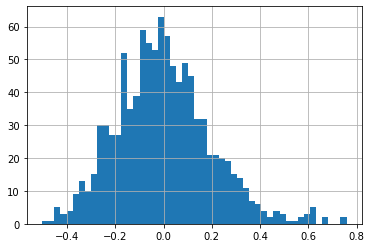

In [ ]:
# I am initializing an array with 1000 zero entries
kurt=np.zeros(1000)

#now each step of the for loop I am drawing one realization of sample exactly as large as our sample
for i in range(0,1000):
    X=pd.Series(np.random.normal(mu,std,T))
    kurt[i]=X.kurtosis()
    


pd.Series(kurt).hist(bins=50)

**A comment on sample moments vs populational moments**

We care about the population variance, i.e. what is the true variance of these assets going forward

We use the realized variance to the extent it help us estimate this.

Just like with average returns and expected returns

The key assumption, which tends to be ok over long time-peridos (say acorss years) is that the volatility is kind of stable, so we use the overall variance to gauge what the population is.

We will later discuss methods that deal with time-variation in these moments, but for now lets think as the population moments being constant

**dealing wiht the risk-free rate**

Again the risk-free rate is different, becasue as we discussed variation in the risk-free rate directly tracks what people expect to get from investing in the risk-free asset in different points in time, and not risk, so the formal way to think about it is what people call the Law of interated expectations


$$Var(R)=Var(E_t[R])+E(Var_t[R])$$

So the overal variance of a series is the sum of the vairance of what people expected at a point in time and the average value of the variance of the asset at a given point in time

For a risky asset, we think that there is very little variation in $E_t[R]$ so the overall variance is all risk.

For a risk-less asset, there is zero risk, so the second term is zero, and all the variantion of the asset is about variation in these expectations.

This means that is wrong to add the risk-free rate when you do variance calculations because you are attributing to risk, which is variation in what people expected to earn (and that is not risk)





* Below I reproduce the plot of constructed last chapter

* It shows the average **EXCESS** return and standard deviation for portfolios with different weights in the risk-free asset, the US stock market, and the international stock market


![MVfrontier](../../assets/plots/MV1.jpg)

* The upper envelope that defines the "investment frontier", i.e., what is achievable in terms of risk and expected returns

* If you are in this envelope, you know that in order to get less risk you will have to reduce your expected return

* There is no portfolio with a higher expected return and the same volatility

* And no portfolio with the same expected return and lower volatility

* In volatility-expected return space all these "investment frontier" portfolio are in a straight line

* What does this mean?

* These portfolios achieve exactly the same ratio of expected excess return per unit of volatility since a straight line has constant slope

* So all these portfolios have exactly the same Sharpe ratio ($\frac{E[r_p-R_f]}{std(r_p-R_f)}$)

* This is also the maximum SR among all possible portfolios of the basis assets 

  *  (in this case only two: US and world portfolio)


> What do these "efficient" portfolios look like? Do they have the same weights? How do the weights in the assets vary?




## **Mathematical derivation of the Mean-variance Frontier**

* These portfolios all can be thought as minimizing variance for a given desired expected return

* or maximizing expected returns for a given aversion to variance 

* Formally they are choosing their composition of their portfolio 

$$r_p(X)=X'R+(1-\sum_i^I x_i)r_f$$

* Which is a portfolio that invests in risky assets (vector of returns R) and the rest $(1-\sum_i^I x_i)$ at the risk-free rate.

* note that I use big R here to emphasize that this is a vector of asset returns, like ($[r^{AAPL},r^{TSLA},..]$), and little $r_f$ to emphasize this is just a scalar (like 1%)

* Note that $(1-\sum_i^I x_i)<0$. what is the interpretation of this number being negative? What is the interpretation of being positive?

* So given weights X, asset returns R and rf, the portfolio returns $r_p(X)$

$$
\begin{aligned}
maximize_{X} E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))\\
\end{aligned}
$$


### **Excess return representation**

It is much easier to do the math and see what is going on if we separate the excess returns and the return piece so we represent our portfolio as

$$r_p(X)=X'R+(1-\sum_i^I x_i)r_f=X'R+r_f-(\sum_i^I x_i)r_f=X'(R-r_f)+r_f$$

$$r_p(X)=X'R^e+r_f$$

* where $R^e$  is the vector of excess returns
* It is KEY to note that all the risky assets are now zero cost portfolios
* So each risky asset is really a portfolio that is long the risky asset and short the risk-free rate
* This means that no matter the sum of the weights in X, the cost of this risky portfolio is zero
* How this this works?
* Say you have 1m dollar to invest
   - We represent your portfolio as:
   - The compositions/relative weights  $X/\sum x_i$ of your risky portfolio
   - How much of this dollar to allocate to you risky portfolio by choosing $\sum x_i$ the total fraction of your wealth invested in risky assets
* If  $\sum x_i>1$ then you are leveraging since you are investing more that 100% of your wealth in the risky assets, i.e. borrowing money to invest more than you have in the risky assets. 
* If $\sum x_i<1$ then you are invest a fraction less than 1 in the risky portfolio, thus you are leaving some money invested in the risk-free asset

You can think borrowing as shorting. They are different words for the same thing when used in the context of risk-free assets

### **Solution**


* First write our objective function in vector notation

$$E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))=E[r_f+X'R^e]- \frac{\gamma}{2} Var(r_f+X'R^e)$$

$$E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))=r_f+X'E[R^e]- \frac{\gamma}{2} X'Var(R^e)X$$

* All you need is to take the derivative of the expression with respect to the risky portfolio weights $X$ :


$$E[R^e]- 2\gamma/2 Var(R^e)X$$

* and impose the "first order condition":
$$
\begin{aligned}
E[R^e]- \gamma Var(R^e)X^*=0
\end{aligned}
$$

* which simply means that if $X^*$ is really the weight that maximizes the expression, if you move it a little bit in any direction, the value of the expression shouldn't move much


*An aside*

* What is the intution for this condition?

* It says that for a tiny move in either direction, the benefit should be zero either way

* Lets consider that we want to find the x that maximizes: $4x-x^2$  

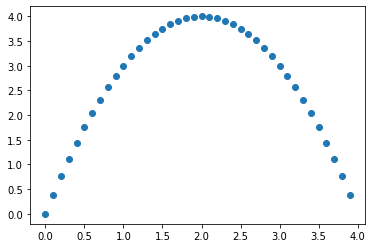

In [ ]:
x=np.arange(0,4,0.1)
plt.scatter(x,4*x-x**2)

* This is maximized at 2

* The FOC for this case is simply the derivatinve of $4x-x^2$ which is

$$4-2x^*=0$$

* Which means $x^*=2$

* You see in the plot that pertubating x a little bit has no effect on the value

* close to the peak, the expression is flat.


## **The Tangecy  portfolio**



* Rewriting our first order condition we have


$
\begin{align}
\gamma Var(R^e)X^* &=E[R^e]\\
(\gamma Var(R^e))^{-1}\gamma Var(R^e)X^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
X^* &=(\gamma Var(R^e))^{-1}E[R^e]\\
X^* &=\frac{1}{\gamma} Var(R^e)^{-1}E[R^e]
\end{align}$

* We simply multiplied both the RHS and the LHS by the inverse of the matrix $\gamma Var(R^e)$ that was multiplying the weight

* This is equivalent to solving 5x=4, by dividing though by 5 to get x=4/5, but in matrix form


*Questions*

* How does your distaste for risk $\gamma$ impact your portfolio composition?

* Does it impact the relative weights in the risky assets?

Note that $X^*$ is the optimal position in risky assets and therefore has the same dimension as the number of assets you are considering. 




__________________

*Aside: Three different problems with exactly the same solution*

We solved this problem

$$
\begin{aligned}
maximize_{(X)} E[X'R^e]- \gamma/2 Var(X'R^e)\\
\end{aligned}
$$

This problem has the same solution as minimizing the variance subject to hitting a desired minimum expected return target


$$
\begin{aligned}
minimize_{(X)} Var(X'R^e) \text{    subject to } E[X'R^e]\geq\mu^{Desired}\\
\end{aligned}
$$

or maximizing the expected  return subject to hitting a maximum desired volatility  target


$$
\begin{aligned}
maximize_{(X)} E(X'R^e) \text{   subject to } Var(X'R^e)\leq Var^{Desired}\\
\end{aligned}
$$

This means that once we have the tangency portfolio solution we can simply scale up and down the portfolio weights to achieve the desired volatility or expected return

## **Two-fund separation**

* It tells us that the decision of which assets to invest is completely independent of your risk-aversion

* Your risky portfolio is always the same, and you risk-aversion simply determines how much of it you will have, versus the risk-free rate

* Please take a moment to appreciate this 

* Why that happens?

Because any portfolio that is proportional to $Var(R^e)^{-1}E[R^e]$ achieve the highest feasible Sharpe Ratio

* Why is that?

Recall what a SR is : $E[r-r_f]/\sigma(r-r_f)$. Since this portfolio solves the problem of maximizing expected return for a given level of volatility, it also is the portfolio with maximum Sharpe Ratio

Note further that any linear combination of this portfolio with the risk-free rate will achieve exactly the same sharpe ratio. 

Let $r_p=r_f+wr^*$ then $E[r_p-r_f]/\sigma(r_p)=E[wr^*]/\sigma(wr^*+r_f)=E[r^*]/\sigma(r^*)$




## **Properties of the Tangency Portfolio**

Any portfolio that is proportional to  $Var(R^e)^{-1}E[R^e]$ is in the **Tangency** of the mean-variance frontier

I will refer to $X_T=Var(R^e)^{-1}E[R^e]$ as the tangency portfolio, but formally any other portfolio that is of the form $y X_T$ where y is a scalar is also tangency.

1. What is the expected excess return of the tangency portfolio?

$$E[yX_T'R^e]=yE[E[R^e]'Var(R^e)^{-1}R^e]=yE[R^e]'Var(R^e)^{-1}E[R^e]$$

2. What is the volatility of the tangency portfolio?

$$Var[yX_T'R^e]=y^2Var(E[R^e]'Var(R^e)^{-1}R^e)=y^2E[R^e]'Var(R^e)^{-1}Var(R^e)Var(R^e)^{-1}E[R^e]$$

$$Var[yX_T'R^e]=y^2E[R^e]'Var(R^e)^{-1}E[R^e]$$

$$STD[yX_T'R^e]=y\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

3. What is the Sharpe Ratio of the Tangency portfolio?

$$\frac{E[yW_T'R^e]}{STD[yW_T'R^e+r_f]}=\sqrt{E[R^e]'Var(R^e)^{-1}E[R^e]}$$

As we saw before, the Sharpe Ratio is invariant to the precise location that you choose in the investment frontier. 

Volatility and Expected excess return will vary, but any leverage effect will exactly cancel out when you look at the Sharpe Ratio

So Sharpe Ratio is nice because it is invariant to leverage

**Portfolio advice summary (so far!)**

* All investors invest in the same portfolio of risky assets, regardless of risk aversion.

* Depending on risk aversion (desired level of volatility) , they choose an appropriate mix of risk-free and risky fund investments

__________________
*Reality is a bit more complicated*

- Here we assume your preferences: You like higher portfolio expected returns and dislikes portfolio variance

- Peoples preferences for risk are likely to be much richer than these simple preferences

- We will discuss later how to incorporate other risk dimensions (tail risks, background risks, etc)

- We also ignore investment horizon effects which we will discuss later in the course




In econometrics there is a whole field dedicated towards finding features of the data that are "robust". Features that don't vary too much from sample to sample.

As you can see this can be super useful here. 

This techniques get complicated very quickly with Bayesian methods, Shrinkage methods, and so on. Well beyond the scope of this class.

The industry however uses two approaches that attempt to get at that by de-emphasizing information about the pieces of the data that we are most uncertain about.

Two approaches are particularly popular


  * Minimum-variance investing
  
  * Risk parity
  


**Minimum-variance investing**


* Mean-variance investing under the assumption that all assets have same expected returns, but uses covariance matrix to minimize risk

 * The idea is that expected returns signals are pure noise so we might as well assume there are no signals and all expected returns are the same
  
 * For example this is behind Minimum volatility investing for example, [https://investor.vanguard.com/mutual-funds/profile/VMVFX]
  
* Assumes all assets have the same expected return

$$Min~ W'Var(R)W~ subject~ to~ \mathbf{1}'W=1$$

$$W_{minvariance}\propto Var(R)^{-1}\mathbf{1}$$

Imposing the constraint: 
$$W_{minvariance}=\frac{Var(R)^{-1}\mathbf{1}}{\mathbf{1}^TVar(R)^{-1}\mathbf{1}}$$

* I use this technique in "hedging-risk factors", a recent academic paper, to construct portfolios with Sharpe-ratios of 0.8 at the yearly horizon, which is very large

> Why this might make sense?

So you see here that the problem is really identical to the mean-variance problem. We simply substituted the vector or Expected returns by a vector of ones.

The end result is that now the solution is the portfolio that minimizes variance while being fully invested as the constraint $\mathbf{1}'W=1$ means $\sum_i^I w_i*1=1$




**Risk- Parity**


* Risk-parity investing: Mean-variance investing under the assumption that all expected returns are equal, and the correlations across all assets are zero. 
  * Sometimes the assumption is that all Sharpe Ratios are equal 
  * This is the strategy behind the biggest hedge funds on the planet [https://www.bridgewater.com/resources/our-thoughts-about-risk-parity-and-all-weather.pdf]
  

* It assumes that the non-diagonal terms in the covariance matrix are all zero.

$$Var_{RP}(R)=diag(Var(R))=\left[\begin{array}{ccc}\sigma_1^2 & 0 & 0\\0 & \sigma_2^2 &0 \\0 & 0& \sigma^2_3\end{array}\right]$$

* we then have 

$$Min~ W'Var_{RP}(R)W ~ subject~ to~ \mathbf{1}'W=1$$

* it follows

$$W_{RP}\propto Var_{RP}(R)^{-1}\mathbf{1}=\left[\begin{array}{c}\frac{1}{\sigma_1^2}\\\frac{1}{\sigma_2^2}\\\frac{1}{\sigma_3^2}\end{array}\right]$$



* another implementation is one where the Sharpe Ratio is the same across assets, so the Expected return scales with volatility.

$$E_{RP}(R)=\left[\begin{array}{ccc}\sigma_1\\\sigma_2\\\sigma_3\end{array}\right]\times SR$$


$$W_{RP}=Var_{RP}(R)^{-1}E_{RP}[R]=\left[\begin{array}{ccc}\sigma_1^2 & 0 & 0\\0 & \sigma_2^2 &0 \\0 & 0& \sigma^2_3\end{array}\right]^{-1}\left[\begin{array}{ccc}\sigma_1\\\sigma_2\\\sigma_3\end{array}\right]\times SR=SR\left[\begin{array}{c}\frac{1}{\sigma_1}\\\frac{1}{\sigma_2}\\\frac{1}{\sigma_3}\end{array}\right]$$


$$W_{RP}\propto \left[\begin{array}{c}\frac{1}{\sigma_1}\\\frac{1}{\sigma_2}\\\frac{1}{\sigma_3}\end{array}\right]$$

In the first approach you invest inversely proportional to variance

In the second approach you invest inversely proportional to volatility

The important point is that estimate even less moments than the minimum-variance approach. Now it assumes all correlations are zero

> Why this might make sense?

> Why does the assumption of ZERO correlation a conservative ASSUMPTION?


Below we will implement the second approach.

The key trick that we will use is the `np.diag()` function to extract the diagonal of the covariance matrix when applied to a matrix and to build a matrix only with the diagonal terms when applied to a vector

**Application 3: what is a good Momentum ETF?**

<AxesSubplot:xlabel='date'>

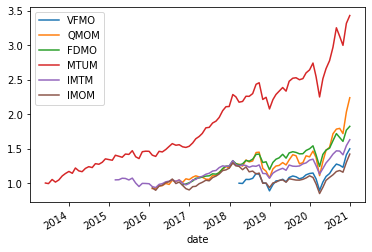

In [ ]:
names=['VFMO','QMOM','FDMO','MTUM','IMTM','IMOM']
dmom=get_returns([names[0]],conn,'1/1/1960','1/1/2022')
for n in names[1:]:
    df=get_returns([n],conn,'1/1/1960','1/1/2022')
    dmom=dmom.merge(df,left_index=True,right_index=True,how='outer')
dmom.columns=names    
(dmom+1).cumprod().plot()

In [ ]:

# lets merge
df=(dff6/100).merge(dmom.to_period("M"),left_index=True,right_index=True,how='inner')
# lets conver to excess returns
df[names]=df[names].subtract(df['RF'],axis=0)

In [ ]:
temp.columns

Index(['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'Mom   ', 'VFMO', 'QMOM',
       'FDMO', 'MTUM', 'IMTM', 'IMOM'],
      dtype='object')

In [ ]:
temp=df.copy() 
x= sm.add_constant(temp[['Mkt-RF','Mom   ']])
results=pd.DataFrame([],index=[],columns=names)
for n in names:
    y= temp[n]
    res= sm.OLS(y,x,missing='drop').fit()
    results.at['alpha',n]=res.params[0]
    results.at['t(alpha)',n]=res.tvalues[0]
    results.at['betamkt',n]=res.params[1]
    results.at['t(betamkt)',n]=res.tvalues[1]
    results.at['betamom',n]=res.params[2]
    results.at['t(betamom)',n]=res.tvalues[2]
    results.at['R-squared',n]=res.rsquared
    results.at['indio risk',n]=res.resid.std()*12**0.5
    results.at['sample size',n]=res.nobs
results

,VFMO,QMOM,FDMO,MTUM,IMTM,IMOM
alpha,-0.001458,-0.002718,-0.002354,0.001112,-0.002008,-0.005894
t(alpha),-0.430959,-0.63581,-1.664363,0.869311,-0.847557,-1.459713
betamkt,1.132283,1.39176,1.024135,1.00483,0.761741,0.958616
t(betamkt),16.762846,13.753471,31.996319,31.597999,13.558808,10.029335
betamom,0.186237,0.394746,0.254752,0.345416,0.09699,0.15187
t(betamom),2.178768,3.281823,6.461063,9.626601,1.568105,1.336749
R-squared,0.917845,0.782982,0.960205,0.919332,0.756383,0.674357
indio risk,0.064076,0.107838,0.032342,0.039782,0.065174,0.101857
sample size,34.0,60.0,51.0,92.0,71.0,60.0


* what do you conclude?

* Which ETF would you pick?

* How to think about the alpha here?

* How do you think about the R-squared? Is a large Rsquared good or bad in this case?

* How do you account for the differnece in market betas when investing?

**Fine tuning your strategy**

We know have three piece of data. 

* **Estimation sample**: The estiamtion sample is exactyl as before. This is the sample we will use to estimate moments, construct the portfolios, and so on. That is where your discovery process will take place. Where you will play with different parameters of the strategy. Statistical tests here are not valid

But now the Test sample will change and we will introduce the concept of the hold out sample

* **Test sample**: You will use this to run statistical test and see how a particular parameter configuration works on unseen data. In practice you will do the testing multiple times. For example in this example we will play with the look back windown of the covariance estimator, mean estimator and so on. 

    - So information of the test sample will leak to your method as you do the search.
    
    - You might settle on a particular specification becasue it worked on this particular sample, but not becasuse it is the most robust out of sample
    
    - So when you are searching for the specification that works you have the be very careful to not search "TOO MUCH"" so you are overfitting the Test sample
    
* **Holdout sample**: This is data that your method never looked. That is the true test. You only look at it once you are confident you have a good specification. The hold sample are a much closer reflection of the reality of trading.
    - of course it is impossible to really reproduce the reality of trading on future data and information of the holdout sample might leak through the fact that the researcher know what happened in that sample: there was a fiancial crash, a crypto boom, value did poorly and so on. 
    - This knowledge migth implicly guide your search process. 
    - So you have to be mindful of why you are makign the choices you are making to gaurd against this form of **look-ahead bias**

# CAPItal allocaiton II

In [ ]:
import statsmodels.api as sm

# Define the factors and the market factor
factors = ['SMB', 'HML', 'RMW', 'CMA', 'MOM']
market_factor = 'Mkt-RF'

# Initialize lists to store the results
Alpha = []
Beta = []
residuals = []
Alpha_se = []
# Run univariate regressions
for factor in factors:
    X = sm.add_constant(df_ff6[market_factor])
    y = df_ff6[factor]
    model = sm.OLS(y, X).fit()
    Alpha.append(model.params['const'])
    Beta.append(model.params[market_factor])
    residuals.append(model.resid)

# Convert Alpha and Beta to numpy arrays
Alpha = np.array(Alpha)
Beta = np.array(Beta)

# Calculate the variance-covariance matrix of the residuals
#under the assumption that the residuals are uncorrelated ( they are not!)

residuals_matrix = np.vstack(residuals).T
Sigma_e = np.diag(np.diag(np.cov(residuals_matrix.T)))

# Display the results
print("Alpha:", Alpha*12)
print("Beta:", Beta)
print("Sigma_e:", Sigma_e*12)


,samplemean,MKTUS-1std
MKTUS,1.835334,0.296359
BondUS,1.423373,1.706476
EM,1.605223,1.836827
MKTxUS,-1.026421,-0.221975
BondxUS,3.365823,2.913552


# Voltiming


So the Sharpe ratio is

$$SR_{\sigma}=\frac{E[x_{i,t}r_{i,t+1}]}{\sqrt{Var(x_{i,t}r_{i,t+1})}}$$



$$SR_{\sigma}=\frac{E[\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1}]}{\sqrt{Var(\frac{\alpha_i}{\sigma_{i,t}^2}r_{i,t+1})}}$$


After some manipulation it implies

$$SR_{\sigma}=SR\sqrt{E[\sigma_{i,t}^2]E\left[\frac{1}{\sigma_{i,t}^2}\right]}$$

> Math insight:

> In general $SR_{\sigma}>SR$ because of jensen inequality ($E[F(x)]\geq F(E[X])$ if F is  convex)

> Draw a figure to illustrate

To get some clean closed formulas lets assume vol is log-normal (it is mostly not)

$\sigma_{t}^2=\sigma^2 e^{\epsilon-\frac{1}{2}\sigma^2_{\sigma}}$, with $\epsilon\sim N(0,\sigma^2_{\sigma})$

which satisfied $E[\sigma_t]=\sigma$


$$SR_{\sigma}=SR*e^{\frac{1}{4}\sigma^2_{\sigma}}$$

The more volatility variation you can predict, higher $\sigma_{\sigma}$, the higher the boost in you Sharpe ratio